In [1]:
%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
import os
from datetime import datetime
from matplotlib.colors import ListedColormap, BoundaryNorm

import act
import xarray as xr

In [2]:
# Set your username and token here!
username = 'dzhang'
token = '1727444e2b1a3ffa'

# Set the datastream and start/enddates
# first plot smps aerosol concentration (time series) and size distribution
startdate = '2020-03-13'
enddate = '2020-03-13'
datastream = 'anxthermocldphaseM1.c1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()
ds_anx_phase = act.io.read_arm_netcdf(result)
ds_anx_phase.clean.cleanup()



[DOWNLOADING] anxthermocldphaseM1.c1.20200313.000000.nc

If you use these data to prepare a publication, please cite:

Zhang, D., & Levin, M. Thermodynamic cloud phase (THERMOCLDPHASE). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1871014



ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
datetime(2020,3,13,18)

datetime.datetime(2020, 3, 13, 18, 0)

In [4]:
ds_anx_phase['mpl_backscatter_log'] = 10*np.log10(ds_anx_phase['mpl_backscatter'])
ds_anx_phase['mpl_backscatter_log'].attrs['units'] = f"10 * log10({ds_anx_phase['mpl_backscatter'].attrs['units']})"

/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


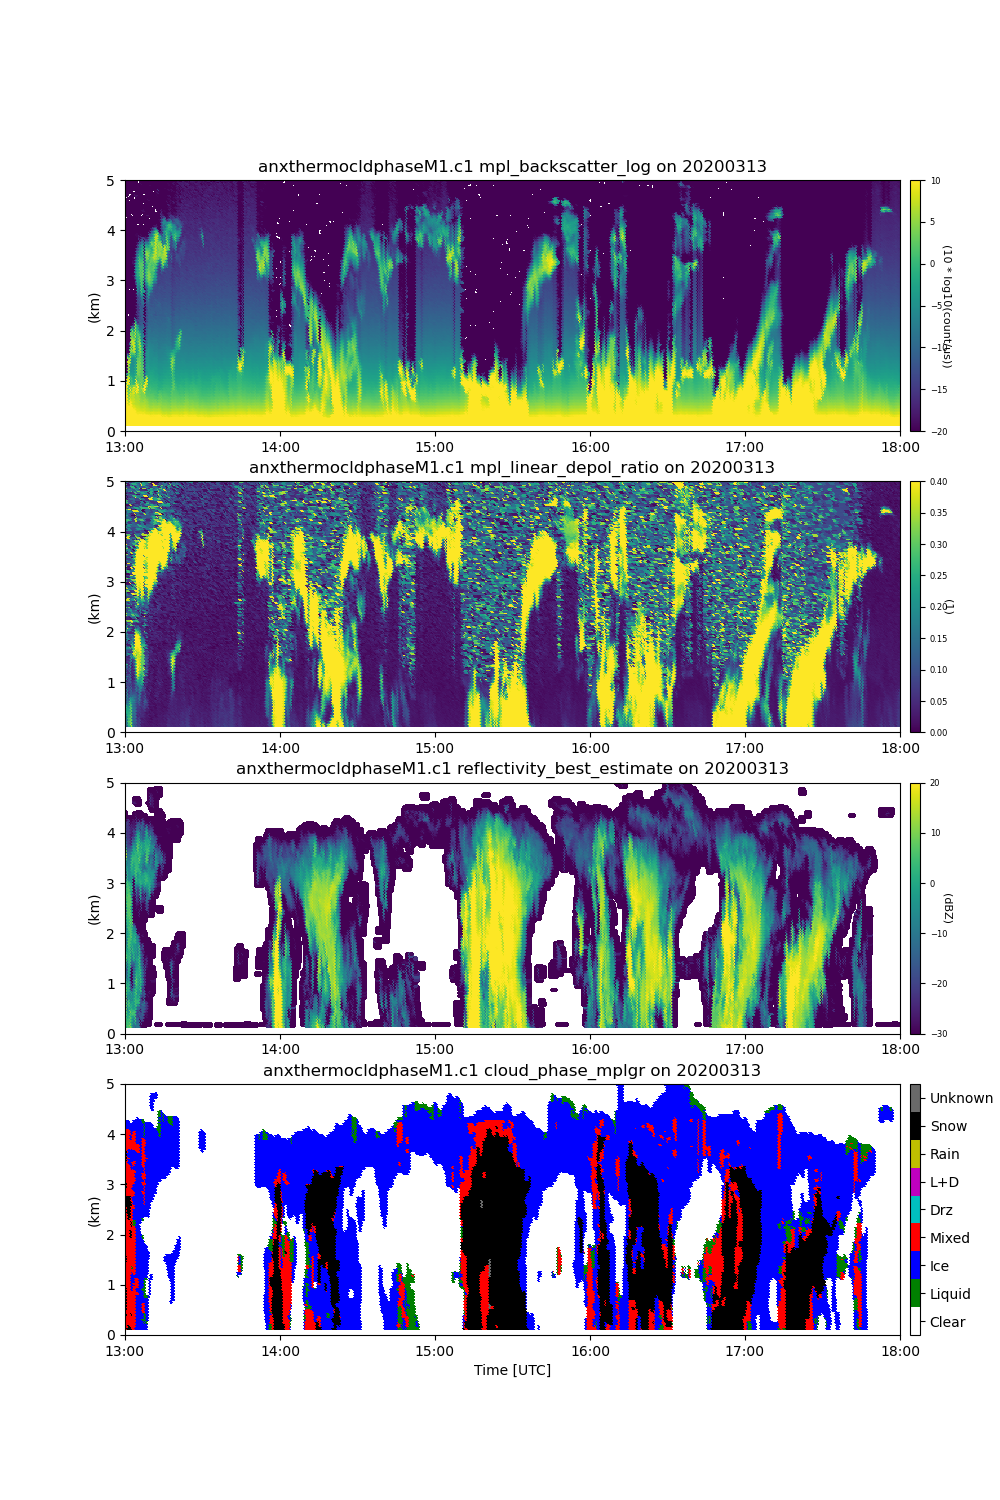

In [7]:
variables = ['mpl_backscatter_log','mpl_linear_depol_ratio', 'reflectivity_best_estimate', 'cloud_phase_mplgr']

display_anx = act.plotting.TimeSeriesDisplay(ds_anx_phase, subplot_shape=(4,), figsize=(10, 15))

display_anx.plot(variables[0], subplot_index=(0,), vmin = -20, vmax = 10)
display_anx.set_yrng([0, 5], subplot_index=(0,))
display_anx.set_xrng([datetime(2020,3,13,13), datetime(2020,3,13,18)], subplot_index=(0,))

display_anx.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.4)
display_anx.set_yrng([0, 5], subplot_index=(1,))
display_anx.set_xrng([datetime(2020,3,13,13), datetime(2020,3,13,18)], subplot_index=(1,))

display_anx.plot(variables[2], subplot_index=(2,), vmin = -30, vmax = 20)
display_anx.set_yrng([0, 5], subplot_index=(2,))
display_anx.set_xrng([datetime(2020,3,13,13), datetime(2020,3,13,18)], subplot_index=(2,))

cmap = ListedColormap(['w', 'g', 'b', 'r', 'c', 'm', 'y', 'k', 'dimgray'])
cbar_labels = {0: {'text': 'Clear', 'color': 'w'}, 1: {'text': 'Liquid', 'color': 'g'},
                2: {'text': 'Ice', 'color': 'b'}, 3: {'text': 'Mixed', 'color': 'r'},
                4: {'text': 'Drz', 'color': 'c'}, 5: {'text': 'L+D', 'color': 'm'},
                6: {'text': 'Rain', 'color': 'y'}, 7: {'text': 'Snow', 'color': 'k'}, 
                8: {'text': 'Unknown', 'color': 'dimgray'}}
display_anx.plot(variables[3], subplot_index=(3,), vmin = 0, vmax = 8,cmap = cmap, colorbar_labels=cbar_labels)
display_anx.set_yrng([0, 5], subplot_index=(3,))
display_anx.set_xrng([datetime(2020,3,13,13), datetime(2020,3,13,18)], subplot_index=(3,))
plt.show()
